/Users/kathelopez/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


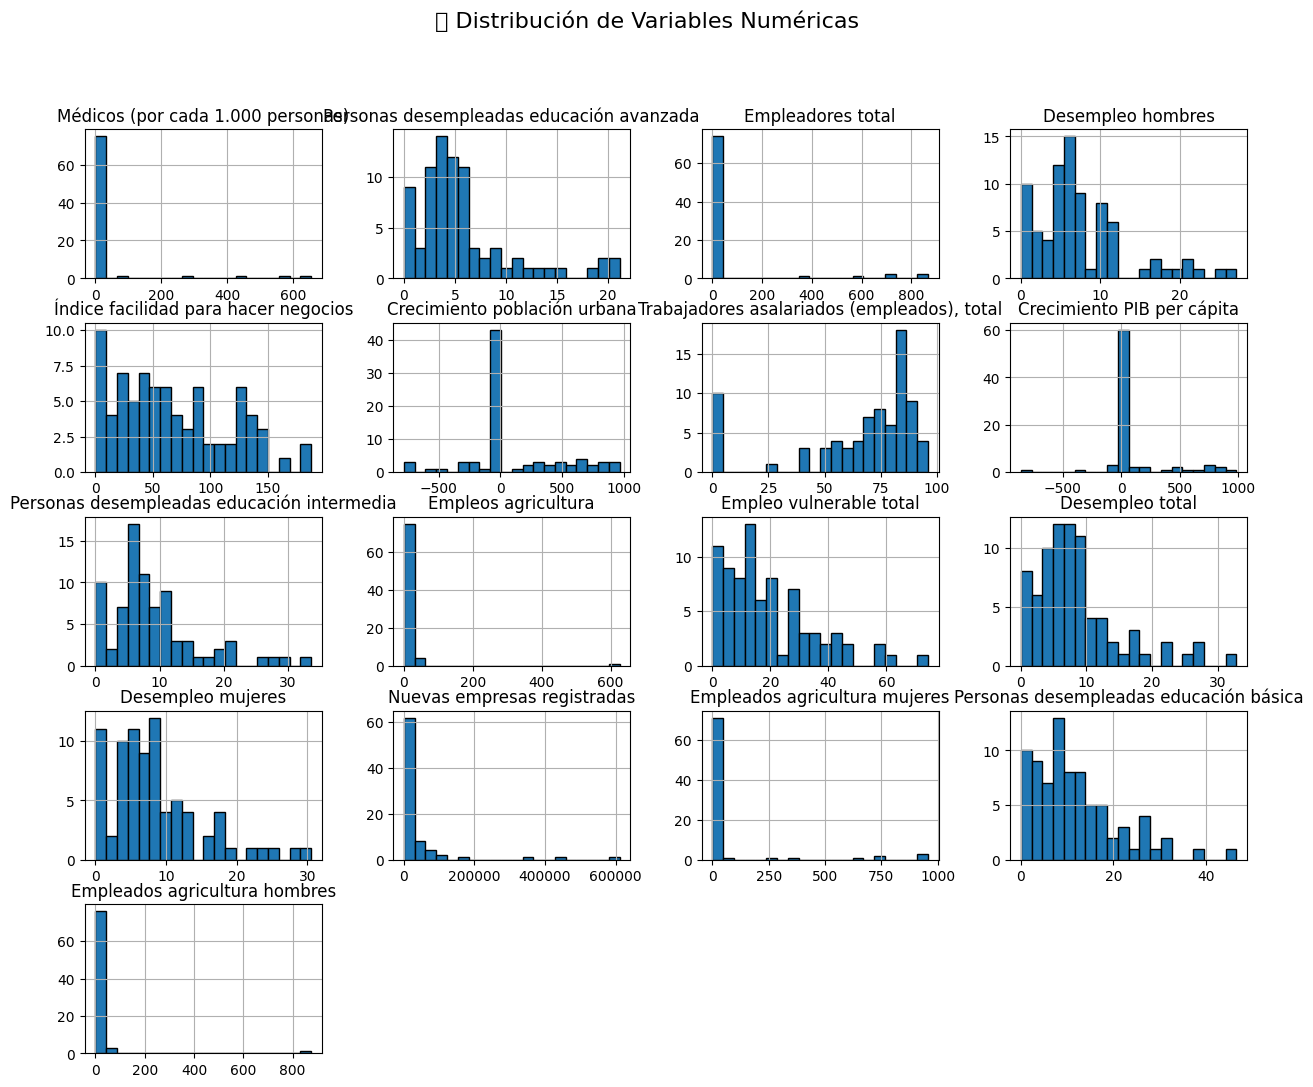

/Users/kathelopez/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


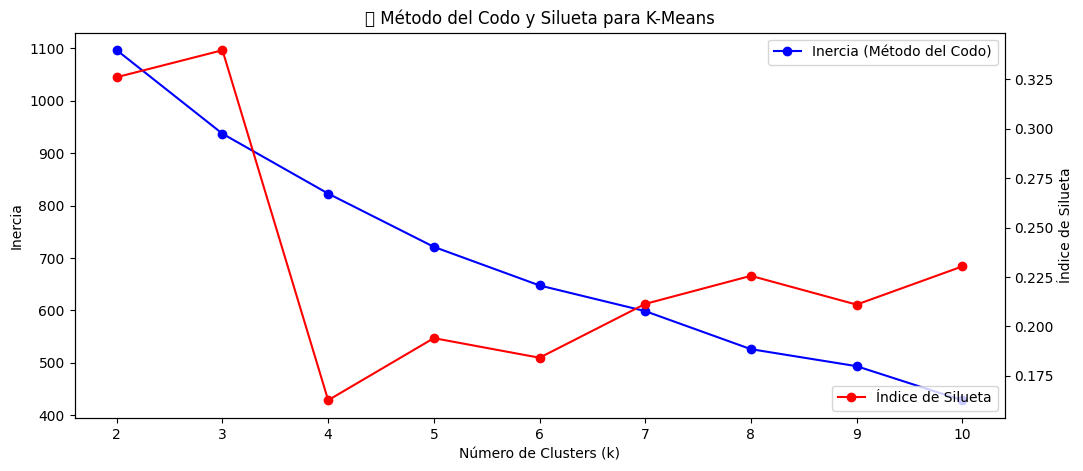


üìå Preguntas para el usuario:
                                            Pregunta  \
0  ¬øQu√© tan importante es para ti la calidad del ...   
1  ¬øPrefieres un pa√≠s con alta empleabilidad y ba...   
2  ¬øEs importante que el pa√≠s tenga un crecimient...   
3  ¬øPrefieres un pa√≠s con alta facilidad para hac...   
4  ¬øTe interesa la estabilidad laboral en un pa√≠s...   
5  ¬øEs relevante que el pa√≠s tenga alta urbanizac...   
6  ¬øConsideras clave la cantidad de empresas regi...   
7  ¬øPrefieres una econom√≠a basada en tecnolog√≠a y...   
8  ¬øTe gustar√≠a un pa√≠s con oportunidades tanto p...   
9  ¬øEs importante para ti la diversidad de empleo...   

                                            Opciones  
0          Muy importante, Moderado, No es relevante  
1  S√≠, prefiero pa√≠ses con bajo desempleo, No me ...  
2  S√≠, quiero un pa√≠s con PIB en crecimiento, No ...  
3  S√≠, prefiero un pa√≠s con facilidad para hacer ...  
4  S√≠, la estabilidad laboral es clave, No es pr

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# üìå 2. Cargar y preparar los datos
file_path = "data_2/country_resumido.csv"  # Ajusta la ruta del archivo
df = pd.read_csv(file_path, delimiter=";")  # Cargar CSV con separador ";"

# Seleccionar solo las columnas num√©ricas
numeric_cols = df.select_dtypes(include=['float64']).columns
df_numeric = df[numeric_cols]

# üìå 3. Visualizar la distribuci√≥n de variables num√©ricas
df_numeric.hist(figsize=(15, 12), bins=20, edgecolor="black")
plt.suptitle("üìä Distribuci√≥n de Variables Num√©ricas", fontsize=16)
plt.show()

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# üìå 4. Determinar el n√∫mero √≥ptimo de clusters (M√©todo del Codo y Silueta)
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Evaluamos de 2 a 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# üìå 5. Graficar el m√©todo del codo y el √≠ndice de silueta
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(K_range, inertia, 'bo-', label='Inercia (M√©todo del Codo)')
ax1.set_xlabel('N√∫mero de Clusters (k)')
ax1.set_ylabel('Inercia')
ax1.set_title('üìà M√©todo del Codo y Silueta para K-Means')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.plot(K_range, silhouette_scores, 'ro-', label='√çndice de Silueta')
ax2.set_ylabel('√çndice de Silueta')
ax2.legend(loc='lower right')

plt.show()

# üìå 6. Aplicar K-Means con el mejor n√∫mero de clusters (basado en el gr√°fico)
best_k = 3  # Puedes cambiarlo seg√∫n el gr√°fico del codo
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# üìå 7. Definir preguntas para clasificar usuarios
preguntas = [
    "¬øQu√© tan importante es para ti la calidad del sistema de salud?",
    "¬øPrefieres un pa√≠s con alta empleabilidad y bajo desempleo?",
    "¬øEs importante que el pa√≠s tenga un crecimiento econ√≥mico positivo?",
    "¬øPrefieres un pa√≠s con alta facilidad para hacer negocios?",
    "¬øTe interesa la estabilidad laboral en un pa√≠s con m√°s asalariados?",
    "¬øEs relevante que el pa√≠s tenga alta urbanizaci√≥n e infraestructura?",
    "¬øConsideras clave la cantidad de empresas registradas en un pa√≠s?",
    "¬øPrefieres una econom√≠a basada en tecnolog√≠a y servicios?",
    "¬øTe gustar√≠a un pa√≠s con oportunidades tanto para empleadores como empleados?",
    "¬øEs importante para ti la diversidad de empleo en distintos sectores?",
]

opciones = [
    "Muy importante, Moderado, No es relevante",
    "S√≠, prefiero pa√≠ses con bajo desempleo, No me afecta tanto",
    "S√≠, quiero un pa√≠s con PIB en crecimiento, No es mi prioridad",
    "S√≠, prefiero un pa√≠s con facilidad para hacer negocios, No es tan relevante",
    "S√≠, la estabilidad laboral es clave, No es prioritario",
    "S√≠, prefiero un pa√≠s con alto crecimiento urbano, No es importante",
    "S√≠, un alto n√∫mero de empresas registradas es clave, No lo considero necesario",
    "S√≠, prefiero econom√≠as tecnol√≥gicas y de servicios, No me importa si es agr√≠cola",
    "S√≠, me gustar√≠a un pa√≠s que favorezca empleadores y empleados, No es necesario",
    "S√≠, quiero variedad de oportunidades laborales, No me importa mucho el sector",
]

df_preguntas = pd.DataFrame({"Pregunta": preguntas, "Opciones": opciones})
print("\nüìå Preguntas para el usuario:")
print(df_preguntas)

# üìå 8. Funci√≥n para clasificar un usuario en un cluster
def clasificar_usuario(respuestas):
    """
    Clasifica al usuario en un cluster basado en sus respuestas.

    Par√°metro:
    - respuestas: diccionario con claves como las variables y valores num√©ricos.

    Retorna:
    - Cluster m√°s cercano seg√∫n las respuestas.
    """
    # Completar respuestas faltantes con la media de cada variable
    respuestas_completas = df_numeric.mean().to_dict()
    respuestas_completas.update(respuestas)  # Reemplazar con valores del usuario

    # Convertir respuestas en array con el orden correcto
    usuario_vector = np.array([respuestas_completas[col] for col in numeric_cols]).reshape(1, -1)

    # Normalizar las respuestas del usuario
    usuario_vector_scaled = scaler.transform(usuario_vector)

    # Predecir el cluster del usuario
    return kmeans.predict(usuario_vector_scaled)[0]

# üìå 9. Simulaci√≥n de respuestas de usuario
respuestas_usuario = {
    "M√©dicos (por cada 1.000 personas)": 8,  # Alta calidad de salud
    "Personas desempleadas educaci√≥n avanzada": 2,  # Bajo desempleo
    "√çndice facilidad para hacer negocios": 90,  # Pa√≠s favorable para negocios
    "Crecimiento PIB per c√°pita": 3.5,  # Crecimiento econ√≥mico positivo
    "Empleos agricultura": 5,  # Baja dependencia del sector agr√≠cola
}

# Clasificar usuario
cluster_usuario = clasificar_usuario(respuestas_usuario)
print(f"\nüìå El usuario pertenece al Cluster {cluster_usuario}")

# üìå 10. Recomendar los 5 mejores pa√≠ses dentro del cluster asignado
pais_cluster = df[df["Cluster"] == cluster_usuario]

# Ordenar por facilidad de negocios (sin mostrar PIB per c√°pita)
pais_recomendados = pais_cluster.sort_values(
    by=["√çndice facilidad para hacer negocios"],
    ascending=True
).head(5)

# üìå 11. Mostrar resultados detallados
print("\nüìå Respuestas exactas del usuario:")
respuestas_detalladas = pd.DataFrame({
    "Variable": respuestas_usuario.keys(),
    "Valor Ingresado": respuestas_usuario.values(),
})
print(respuestas_detalladas)

print("\nüìå Pa√≠ses recomendados para el usuario:")
print(pais_recomendados[["Country Name", "Continent", "√çndice facilidad para hacer negocios"]])

12. Guardar el Modelo Entrenado

Despu√©s de entrenar el modelo KMeans, es importante guardar el modelo y el escalador (StandardScaler) para que se pueda reutilizar sin tener que volver a entrenarlo cada vez.

¬øQu√© hace esto?
- Guarda el modelo KMeans entrenado en un archivo modelo_kmeans.pkl.
- Guarda el StandardScaler en scaler.pkl para que se pueda normalizar nuevos datos de la misma forma.

In [84]:
#C√≥digo para Guardar el Modelo Entrenado:

import joblib  # Para guardar modelos en archivos

# Guardar el modelo KMeans entrenado
joblib.dump(kmeans, "modelo_kmeans.pkl")

# Guardar el StandardScaler para futuras normalizaciones
joblib.dump(scaler, "scaler.pkl")

print("‚úî Modelo y escalador guardados correctamente.")

‚úî Modelo y escalador guardados correctamente.


13. Visualizar los Clusters con PCA

Para asegurarnos de que el clustering tiene sentido, podemos graficar los clusters en 2D usando PCA.

¬øQu√© hace esto?
- Reduce los datos a dos dimensiones con PCA para visualizar los clusters.
- Dibuja los clusters con diferentes colores para ver si est√°n bien separados.

üí° Si los clusters est√°n bien separados, el modelo est√° funcionando bien.
üí° Si los colores est√°n mezclados, podr√≠amos probar otro n√∫mero de clusters (k).

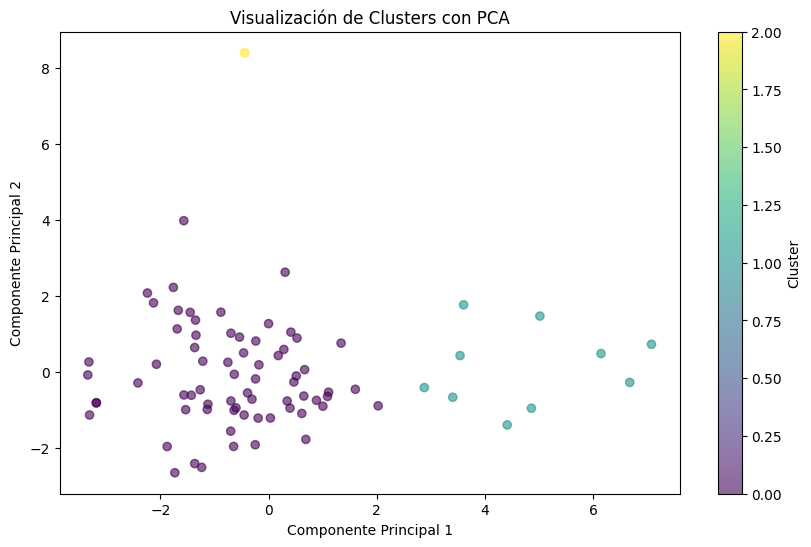

In [85]:
# C√≥digo para Visualizar los Clusters:

from sklearn.decomposition import PCA

# Reducir la dimensionalidad de los datos a 2D con PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Graficar los clusters en 2D
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualizaci√≥n de Clusters con PCA")
plt.colorbar(label="Cluster")
plt.show()

14. Cargar el Modelo Entrenado para Usarlo en el Futuro

Despu√©s de guardar el modelo, podemos recargarlo sin necesidad de volver a entrenarlo.

¬øQu√© hace esto?
- Carga el modelo KMeans y el StandardScaler.
- Clasifica un nuevo usuario sin necesidad de reentrenar el modelo.
- Devuelve el cluster al que pertenece el nuevo usuario.

üí° Esto es √∫til para integrar el modelo en una aplicaci√≥n web.

In [86]:
#C√≥digo para Cargar el Modelo y Clasificar Nuevos Usuarios:

# Cargar el modelo entrenado y el escalador
import joblib
import numpy as np

kmeans = joblib.load("modelo_kmeans.pkl")
scaler = joblib.load("scaler.pkl")

# Crear un usuario nuevo con TODAS las caracter√≠sticas del dataset
nuevo_usuario = {
    "M√©dicos (por cada 1.000 personas)": 7,
    "Personas desempleadas educaci√≥n avanzada": 3,
    "√çndice facilidad para hacer negocios": 80,
    "Crecimiento PIB per c√°pita": 4.0,
    "Empleos agricultura": 10,
}

# Calcular la media de todas las variables num√©ricas y guardarlas
df_numeric_mean = df_numeric.mean().to_dict()
joblib.dump(df_numeric_mean, "df_numeric_mean.pkl")

# Asegurar que TODAS las variables est√©n presentes (rellenar con la media si faltan)
df_numeric_mean = joblib.load("df_numeric_mean.pkl")  # Guardamos previamente las medias

# Crear un diccionario con todas las variables y completar con la media si falta alguna
usuario_completo = df_numeric_mean.copy()
usuario_completo.update(nuevo_usuario)

# Convertir en un array y normalizarlo
usuario_vector = np.array([usuario_completo[col] for col in df_numeric_mean.keys()]).reshape(1, -1)
usuario_vector_scaled = scaler.transform(usuario_vector)

# Predecir el cluster del usuario
cluster_predicho = kmeans.predict(usuario_vector_scaled)[0]

print(f"üìå El usuario pertenece al Cluster {cluster_predicho}")

üìå El usuario pertenece al Cluster 0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


15. Agregar un Reporte Final del Modelo

Para asegurarnos de que el modelo es confiable, podemos generar un resumen con las caracter√≠sticas de cada cluster.

¬øQu√© hace esto?
- Muestra cu√°ntos pa√≠ses hay en cada cluster.
- Calcula el promedio de cada variable en cada cluster.

üí° Esto ayuda a interpretar los clusters y entender qu√© representa cada grupo.

In [87]:
#C√≥digo para Ver la Distribuci√≥n de Clusters en el Dataset:

# üìå 1. Contar cu√°ntos pa√≠ses hay en cada cluster
print("\nüìå Distribuci√≥n de pa√≠ses por Cluster:")
print(df["Cluster"].value_counts())

# üìå 2. Seleccionar solo las columnas num√©ricas antes de calcular la media
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Solo variables num√©ricas

# üìå 3. Calcular la media de cada cluster solo con columnas num√©ricas
cluster_summary = df.groupby("Cluster")[numeric_cols].mean()

print("\nüìå Caracter√≠sticas promedio de cada Cluster:")
print(cluster_summary)


üìå Distribuci√≥n de pa√≠ses por Cluster:
Cluster
0    69
1    10
2     1
Name: count, dtype: int64

üìå Caracter√≠sticas promedio de cada Cluster:
         M√©dicos (por cada 1.000 personas)  \
Cluster                                      
0                                22.682029   
1                                67.932300   
2                                 3.973000   

         Personas desempleadas educaci√≥n avanzada  Empleadores total  \
Cluster                                                                
0                                        4.234754          62.278319   
1                                       16.225900           4.170800   
2                                        3.268000           3.594000   

         Desempleo hombres  √çndice facilidad para hacer negocios  \
Cluster                                                            
0                 5.978014                             67.086957   
1                18.181300                        

In [88]:
print("\nüìå Resumen del An√°lisis:")
print(f"‚úî El usuario pertenece al Cluster {cluster_usuario}")
print(f"‚úî N√∫mero √≥ptimo de clusters detectado: {best_k}")
print(f"‚úî Se han recomendado {len(pais_recomendados)} pa√≠ses seg√∫n sus preferencias.")

# Mostrar tabla con las recomendaciones
import pandas as pd
pd.set_option("display.max_columns", None)  # Para ver todas las columnas
print("\nüåé Pa√≠ses Recomendados:")
print(pais_recomendados[["Country Name", "Continent", "√çndice facilidad para hacer negocios"]])


üìå Resumen del An√°lisis:
‚úî El usuario pertenece al Cluster 0
‚úî N√∫mero √≥ptimo de clusters detectado: 3
‚úî Se han recomendado 5 pa√≠ses seg√∫n sus preferencias.

üåé Pa√≠ses Recomendados:
     Country Name      Continent  √çndice facilidad para hacer negocios
46  Liechtenstein         Europe                                   0.0
21        Curacao  North America                                   0.0
53         M√≥naco         Europe                                   0.0
20           Cuba  North America                                   0.0
4           Aruba  North America                                   0.0


16. Convertir el Modelo en una Aplicaci√≥n Web

Para permitir que los usuarios ingresen sus respuestas y obtengan recomendaciones de pa√≠ses, hacer una aplicaci√≥n web usando xxxxx.

¬øC√≥mo ejecutarlo?
1Ô∏è. xxxxxxxxxxx.
2Ô∏è. Ejecuta el siguiente comando en la terminal:



Esto abrir√° una p√°gina web donde los usuarios pueden interactuar con el modelo.

In [89]:
# codigo p√°gina web

## Pruebas con best_k = 4

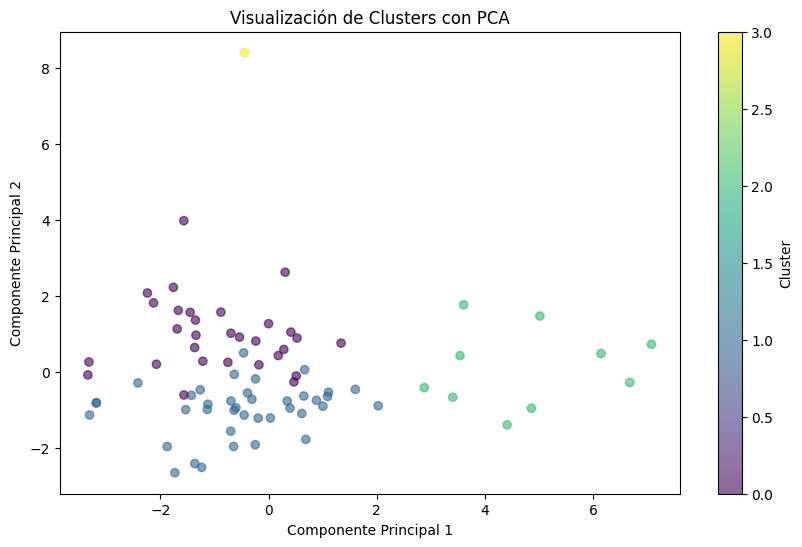

In [90]:
best_k = 4  # O prueba con 5
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Reducir la dimensionalidad a 2D con PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Graficar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualizaci√≥n de Clusters con PCA")
plt.colorbar(label="Cluster")
plt.show()

In [91]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
df["Cluster_DBSCAN"] = dbscan.fit_predict(df_scaled)

In [92]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3)
df["Cluster_Agglo"] = agglo.fit_predict(df_scaled)

In [93]:
# Ver la importancia de cada variable con PCA
pca = PCA(n_components=5)
pca.fit(df_scaled)
print("Importancia de cada variable en los componentes principales:")
print(pd.DataFrame(pca.components_, columns=numeric_cols).T)

Importancia de cada variable en los componentes principales:
                                                    0         1         2  \
M√©dicos (por cada 1.000 personas)            0.072898  0.169594 -0.127179   
Personas desempleadas educaci√≥n avanzada     0.411263  0.007409 -0.124986   
Empleadores total                           -0.047815  0.049406  0.168899   
Desempleo hombres                            0.379344  0.037105  0.159435   
√çndice facilidad para hacer negocios        -0.024613  0.433558 -0.128159   
Crecimiento poblaci√≥n urbana                -0.077986 -0.200942  0.136703   
Trabajadores asalariados (empleados), total  0.110335 -0.126311  0.451879   
Crecimiento PIB per c√°pita                  -0.041180 -0.104275  0.308943   
Personas desempleadas educaci√≥n intermedia   0.433966 -0.004336 -0.052881   
Empleos agricultura                         -0.007234  0.454228  0.382653   
Empleo vulnerable total                      0.017706  0.438404 -0.110764   
Desempleo

In [94]:
# Multiplicar algunas variables por un peso mayor
pesos = {
    "√çndice facilidad para hacer negocios": 2,  # Doble importancia
    "M√©dicos (por cada 1.000 personas)": 1.5,   # 50% m√°s importante
}

# Aplicar los pesos a las respuestas del usuario
respuestas_ponderadas = {key: val * pesos.get(key, 1) for key, val in respuestas_usuario.items()}
cluster_usuario = clasificar_usuario(respuestas_ponderadas)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
